# Building an AWS<sup>®</sup> ML Pipeline with SageWorks

<div style="padding: 20px">
<img width="1000" alt="sageworks_pipeline" src="https://github.com/SuperCowPowers/sageworks/assets/4806709/47cc5739-971c-48c3-9ef6-fd8370e3ec57"></div>

This notebook uses the SageWorks Science Workbench to quickly build an AWS® Machine Learning Pipeline with the AQSolDB public dataset. This dataset aggregates aqueous solubility data for a large set of compounds.

We're going to set up a full AWS Machine Learning Pipeline from start to finish. Since the SageWorks Classes encapsulate, organize, and manage sets of AWS® Services, setting up our ML pipeline will be straight forward.

SageWorks also provides visibility into AWS services for every step of the process so we know exactly what we've got and how to use it.
<br><br>

## Data
AqSolDB: A curated reference set of aqueous solubility, created by the Autonomous Energy Materials Discovery [AMD] research group, consists of aqueous solubility values of 9,982 unique compounds curated from 9 different publicly available aqueous solubility datasets. AqSolDB also contains some relevant topological and physico-chemical 2D descriptors. Additionally, AqSolDB contains validated molecular representations of each of the compounds. This openly accessible dataset, which is the largest of its kind, and will not only serve as a useful reference source of measured and calculated solubility data, but also as a much improved and generalizable training data source for building data-driven models. (2019-04-10)

Main Reference:
https://www.nature.com/articles/s41597-019-0151-1

Data Dowloaded from the Harvard DataVerse:
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/OVHAW8



## SageWorks
SageWorks is a medium granularity framework that manages and aggregates AWS® Services into classes and concepts. When you use SageWorks you think about DataSources, FeatureSets, Models, and Endpoints. Underneath the hood those classes handle all the details around updating and

## Notebook
This notebook uses the SageWorks Science Workbench to quickly build an AWS® Machine Learning Pipeline.

We're going to set up a full AWS Machine Learning Pipeline from start to finish. Since the SageWorks Classes encapsulate, organize, and manage sets of AWS® Services, setting up our ML pipeline will be straight forward.

SageWorks also provides visibility into AWS services for every step of the process so we know exactly what we've got and how to use it.
<br><br>

® Amazon Web Services, AWS, the Powered by AWS logo, are trademarks of Amazon.com, Inc. or its affiliates.

In [1]:
# Okay first we get our data into SageWorks as a DataSource
from sageworks.api.data_source import DataSource

2024-02-14 20:20:29 (sageworks_logging.py:142) INFO SageWorks Logging Setup Complete...
2024-02-14 20:20:59 (config_manager.py:318) INFO Loading site configuration from /Users/briford/.sageworks/scp_sandbox.json...
2024-02-14 20:20:59 (redis_cache.py:79) INFO Opening Redis connection to: localhost:6379...
2024-02-14 20:20:59 (redis_cache.py:95) INFO Redis connection success: localhost:6379...


In [ ]:
s3_path = 's3://sageworks-public-data/comp_chem/aqsol_public_data.csv'
data_source = DataSource(s3_path, 'aqsol_data')

<div style="float: right; padding: 20px"><img src="images/aws_dashboard_aqsol.png" width=600px"></div>

# So what just happened?
Okay, so it was just a few lines of code but SageWorks did the following for you:
   
- Transformed the CSV to a **Parquet** formatted dataset and stored it in AWS S3
- Created an AWS Data Catalog database/table with the columns names/types
- Athena Queries can now be done directly on this data in AWS Athena Console

The new 'DataSource' will show up in AWS and of course the SageWorks AWS Dashboard. Anyone can see the data, get information on it, use AWS® Athena to query it, and of course use it as part of their analysis pipelines.

<div style="float: right; padding: 20px"><img src="images/athena_query_aqsol.png" width=600px"></div>

# Visibility and Easy to Use AWS Athena Queries
Since SageWorks manages a broad range of AWS Services it means that you get visibility into exactly what data you have in AWS. It also means nice perks like hitting the 'Query' link in the Dashboard Web Interface and getting a direct Athena console on your dataset. With AWS Athena you can use typical SQL statements to inspect and investigate your data.
    
**But that's not all!**
    
SageWorks also provides API to directly query DataSources and FeatureSets right from the API, so lets do that now.

In [4]:
data_source.query('SELECT * from aqsol_data limit 5')

2024-02-14 20:27:40 (athena_source.py:227) INFO Athena Query successful (scanned bytes: 1805826)


,id,name,inchi,inchikey,smiles,solubility,sd,ocurrences,group,molwt,...,numrotatablebonds,numvalenceelectrons,numaromaticrings,numsaturatedrings,numaliphaticrings,ringcount,tpsa,labuteasa,balabanj,bertzct
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


# The AWS ML Pipeline Awaits
Okay, so in a few lines of code we created a 'DataSource' (which is simply a set of orchestrated AWS Services) but now we'll go through the construction of the rest of our Machine Learning pipeline.

<div style="padding: 20px">
<img width="900" alt="sageworks_pipeline" src="https://github.com/SuperCowPowers/sageworks/assets/4806709/47cc5739-971c-48c3-9ef6-fd8370e3ec57"></div>

## ML Pipeline
- DataSource **(done)**
- FeatureSet
- Model
- Endpoint (serves models)

# Create a FeatureSet
**Note:** Normally this is where you'd do a deep dive on the data/features, look at data quality metrics, redudant features and engineer new features. For the purposes of this notebook we're simply going to take the features given to us in the AQSolDB data from the Harvard Dataverse, those features are:

In [5]:
data_source.column_details()

{'id': 'string',
 'name': 'string',
 'inchi': 'string',
 'inchikey': 'string',
 'smiles': 'string',
 'solubility': 'double',
 'sd': 'double',
 'ocurrences': 'bigint',
 'group': 'string',
 'molwt': 'double',
 'mollogp': 'double',
 'molmr': 'double',
 'heavyatomcount': 'double',
 'numhacceptors': 'double',
 'numhdonors': 'double',
 'numheteroatoms': 'double',
 'numrotatablebonds': 'double',
 'numvalenceelectrons': 'double',
 'numaromaticrings': 'double',
 'numsaturatedrings': 'double',
 'numaliphaticrings': 'double',
 'ringcount': 'double',
 'tpsa': 'double',
 'labuteasa': 'double',
 'balabanj': 'double',
 'bertzct': 'double'}

In [ ]:
data_source.to_features("aqsol_features")

# New FeatureSet shows up in Dashboard
Now we see our new feature set automatically pop up in our dashboard. FeatureSet creation involves the most complex set of AWS Services:
- New Entry in AWS Feature Store
- Specific Type and Field Requirements are handled
- Plus all the AWS Services associated with DataSources (see above)

The new 'FeatureSet' will show up in AWS and of course the SageWorks AWS Dashboard. Anyone can see the feature set, get information on it, use AWS® Athena to query it, and of course use it as part of their analysis pipelines.

<div style="padding: 20px"><img src="images/dashboard_aqsol_features.png" width=1000px"></div>
    
**Important:** All inputs are stored to track provenance on your data as it goes through the pipeline. We can see the last field in the FeatureSet shows the input DataSource.

# Publishing our Model
**Note:** Normally this is where you'd do a deep dive on the feature set. For the purposes of this notebook we're simply going to take the features given to us and make a reference model that can track our baseline model performance for other to improve upon. :)

In [ ]:
from sageworks.api.feature_set import FeatureSet
from sageworks.api.model import Model, ModelType

# Compute our features
feature_set = FeatureSet("aqsol_features")
feature_list = [
    "sd",
    "ocurrences",
    "molwt",
    "mollogp",
    "molmr",
    "heavyatomcount",
    "numhacceptors",
    "numhdonors",
    "numheteroatoms",
    "numrotatablebonds",
    "numvalenceelectrons",
    "numaromaticrings",
    "numsaturatedrings",
    "numaliphaticrings",
    "ringcount",
    "tpsa",
    "labuteasa",
    "balabanj",
    "bertzct",
]
feature_set.to_model(
    ModelType.REGRESSOR,
    target_column="solubility",
    name="aqsol-regression",
    feature_list=feature_list,
    description="AQSol Regression Model",
    tags=["aqsol", "regression"],
)

<div style="float: right; padding: 20px"><img src="images/model_screenshot.png" width=500px"></div>

# Model is trained and published
Okay we've clipped the output above to focus on the important bits. The SageWorks model harness provides some simple model performance output

- FIT/TRAIN: (8056, 35)
- VALIDATiON: (1926, 35)
- RMSE: 1.175
- MAE: 0.784
- R2 Score: 0.760

The SageWorks Dashboard also has a really spiffy model details page that gives a deeper dive on the feature importance and model performance metrics.

**Note:** Model details is still WIP/Alpha version that we're working on :)

# Deploying an AWS Endpoint
Okay now that are model has been published we can deploy an AWS Endpoint to serve inference requests for that model. Deploying an Endpoint allows a large set of servies/APIs to use our model in production.

In [ ]:
m = Model("aqsol-regression")
m.to_endpoint(name="aqsol-regression-end", tags=["aqsol", "regression"])

# Model Inference from the Endpoint
AWS Endpoints will bundle up a model as a service that responds to HTTP requests. The typical way to use an endpoint is to send a POST request with your features in CSV format. SageWorks provides a nice DataFrame based interface that takes care of many details for you.

In [10]:
# Get the Endpoint
from sageworks.api.endpoint import Endpoint
my_endpoint = Endpoint('aqsol-regression-end')

2024-02-14 20:52:49 (artifact.py:87) INFO Health Check Passed aqsol-regression-end
2024-02-14 20:52:49 (endpoint_core.py:98) INFO EndpointCore Initialized: aqsol-regression-end


# Model Provenance is locked into SageWorks
We can now look at the model, see what FeatureSet was used to train it and even better see exactly which ROWS in that training set where used to create the model. We can make a query that returns the ROWS that were not used for training.

In [13]:
# Get a DataFrame of data (not used to train) and run predictions
table = feature_set.get_training_view_table()
test_df = feature_set.query(f"SELECT * FROM {table} where training = 0")
test_df.head()

2024-02-14 20:55:43 (athena_source.py:227) INFO Athena Query successful (scanned bytes: 3021672)


,write_time,api_invocation_time,is_deleted,id,name,inchi,inchikey,smiles,solubility,sd,...,labuteasa,balabanj,bertzct,event_time,group_g1,group_g2,group_g3,group_g4,group_g5,training
0,2024-02-15 03:37:32.759000+00:00,2024-02-15 03:31:42+00:00,False,C-1040,methyclothiazide,InChI=1S/C9H11Cl2N3O4S2/c1-14-9(4-10)13-6-2-5(...,CESYKOGBSMNBPD-UHFFFAOYSA-N,CN1C(CCl)NC2=C(C=C(C(=C2)Cl)[S](N)(=O)=O)[S]1(...,-3.780000,0.000000,...,126.298069,2.751349,763.642493,2024-02-15T03:30:54.723Z,1,0,0,0,0,0
1,2024-02-15 03:37:32.759000+00:00,2024-02-15 03:31:43+00:00,False,B-1185,1-monobutyrin,"InChI=1S/C7H14O4/c1-2-3-7(10)11-5-6(9)4-8/h6,8...",RIEABXYBQSLTFR-UHFFFAOYSA-N,CCCC(=O)OCC(O)CO,-1.335000,0.000000,...,65.792439,3.298262,113.008201,2024-02-15T03:30:54.723Z,1,0,0,0,0,0
2,2024-02-15 03:37:32.759000+00:00,2024-02-15 03:31:43+00:00,False,E-855,Sulfapyrazine,"InChI=1S/C10H10N4O2S/c11-8-1-3-9(4-2-8)17(15,1...",YEAICDDXRUOCKJ-UHFFFAOYSA-N,c1cc(N)ccc1S(=O)(=O)Nc2cnccn2,-3.700000,0.000000,...,98.578322,2.285509,595.962841,2024-02-15T03:30:54.723Z,1,0,0,0,0,0
3,2024-02-15 03:37:32.759000+00:00,2024-02-15 03:31:45+00:00,False,B-1935,"trans-2,5-dimethylpiperazine","InChI=1S/C6H14N2/c1-5-3-8-6(2)4-7-5/h5-8H,3-4H...",NSMWYRLQHIXVAP-OLQVQODUSA-P,C[C@H]1C[NH2+][C@H](C)C[NH2+]1,0.486400,0.000000,...,50.657855,2.192377,54.928787,2024-02-15T03:30:54.723Z,1,0,0,0,0,0
4,2024-02-15 03:37:32.759000+00:00,2024-02-15 03:31:46+00:00,False,A-204,"1,4-dibutyl benzene-1,4-dicarboxylate",InChI=1S/C16H22O4/c1-3-5-11-19-15(17)13-7-9-14...,LQLQDKBJAIILIQ-UHFFFAOYSA-N,CCCCOC(=O)c1ccc(cc1)C(=O)OCCCC,-6.403195,0.688111,...,119.630959,2.503712,381.607942,2024-02-15T03:30:54.723Z,0,0,0,1,0,0


In [16]:
# Okay now use the SageWorks Endpoint to make prediction on TEST data
prediction_df = my_endpoint.predict(test_df)
metrics = my_endpoint.regression_metrics('solubility', prediction_df)
print(metrics)

Processing...
Processing...
Processing...
Processing...
Processing...
        MAE      RMSE        R2       MAPE     MedAE
0  0.475673  0.730235  0.905929  97.249588  0.321865


In [17]:
# Lets look at the predictions versus actual values
prediction_df[['id', 'solubility', 'prediction']]

,id,solubility,prediction
0,C-1040,-3.78,-3.087705
1,B-1185,-1.335,0.330099
2,E-855,-3.7,-2.732397
3,B-1935,0.4864,0.951016
4,A-204,-6.403195,-4.885643
...,...,...,...
2007,A-5136,0.371965,0.616739
2008,A-2084,-6.490069,-6.43098
2009,A-4144,-1.809694,-0.283142
2010,A-2104,-5.74797,-5.353285


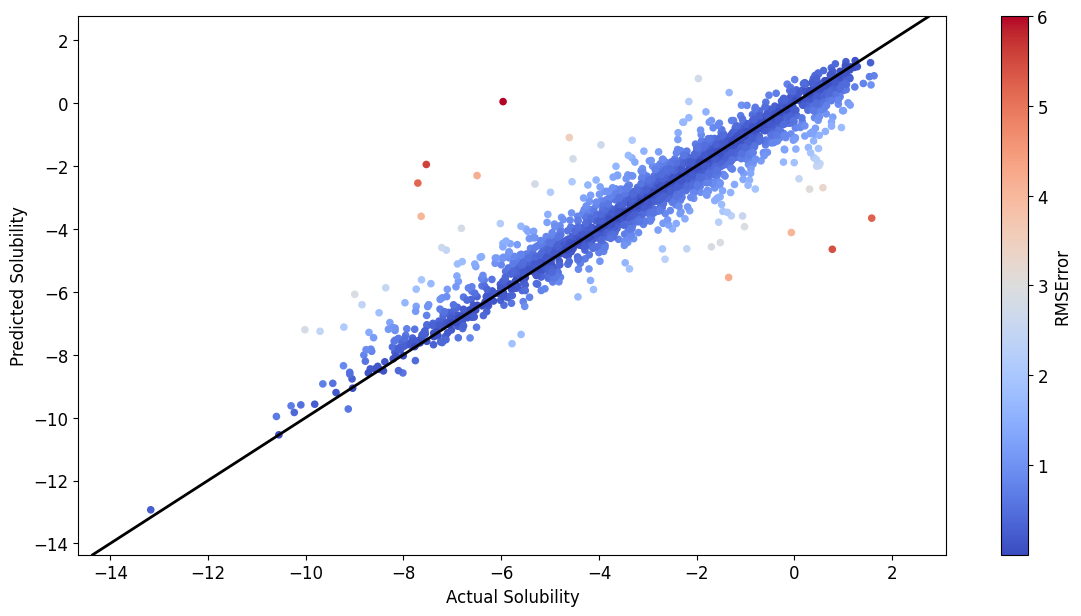

In [22]:
plot_predictions(prediction_df)

# Follow Up on Predictions
Looking at the prediction plot above we can see that many predictions were close to the actual value but about 10 of the predictions were WAY off. So at this point we'd use SageWorks to investigate those predictions, map them back to our FeatureSet and DataSource and see if there were irregularities in the training data.

# Wrap up: Building an AWS<sup>®</sup> ML Pipeline with SageWorks

<div style="float: right; padding: 20px"><img width="450" src="https://user-images.githubusercontent.com/4806709/266844238-df2f1b90-9e6f-4dbb-9490-ad75545e630f.png"></div>



This notebook used the SageWorks Science Toolkit to quickly build an AWS® Machine Learning Pipeline with the AQSolDB public dataset. We built a full AWS Machine Learning Pipeline from start to finish. 

SageWorks made it easy:
- Visibility into AWS services for every step of the process.
- Managed the complexity of organizing the data and populating the AWS services.
- Provided an easy to use API to perform Transformations and inspect Artifacts.

Using SageWorks will minimizize the time and manpower needed to incorporate AWS ML into your organization. If your company would like to be a SageWorks Alpha Tester, contact us at [sageworks@supercowpowers.com](mailto:sageworks@supercowpowers.com).

<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>

# Helper Methods

In [18]:
# Helper to look at predictions vs target
from math import sqrt
import pandas as pd
def plot_predictions(df, line=True):
    
    # Dataframe of the targets and predictions
    target = 'Actual Solubility'
    pred = 'Predicted Solubility'
    df_plot = pd.DataFrame({target: df['solubility'], pred: df['prediction']})
    
    # Compute Error per prediction
    df_plot['RMSError'] = df_plot.apply(lambda x: sqrt((x[pred] - x[target])**2), axis=1)
    #df_plot['error'] = df_plot.apply(lambda x: abs(x[pred] - x[target]), axis=1)
    ax = df_plot.plot.scatter(x=target, y=pred, c='RMSError', cmap='coolwarm', sharex=False)
    
    # Just a diagonal line
    if line:
        ax.axline((1, 1), slope=1, linewidth=2, c='black')
        x_pad = (df_plot[target].max() - df_plot[target].min())/10.0 
        y_pad = (df_plot[pred].max() - df_plot[pred].min())/10.0
        plt.xlim(df_plot[target].min()-x_pad, df_plot[target].max()+x_pad)
        plt.ylim(df_plot[pred].min()-y_pad, df_plot[pred].max()+y_pad)

In [21]:
# Plotting defaults
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-deep')
#plt.style.use('seaborn-dark')
plt.rcParams['font.size'] = 12.0
plt.rcParams['figure.figsize'] = 14.0, 7.0